# Loan Application Status Prediction

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [180]:
# import our dataset
loan_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [181]:
#printing the dataset
loan_data 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [182]:
# checking the first 5 observations of the dataset
loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [183]:
#checking the shape of the dataset
loan_data.shape

(614, 13)

In [184]:
#checking information about the dataset
loan_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [185]:
#getting an idea of the descriptive statistics
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Data Preprocessing

In [186]:
#checking the tail of dataset
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


After observing the dataset closely we understand that the column Loan_ID is an unnecessary column and removing it will not cause any effect on the target column or our prediction. So, we will remove 'Loan_ID'

In [187]:
#df.columns=[column.replace(" ","_") for column in df.columns]
loan_data=loan_data.drop("Loan_ID",axis=1)

In [188]:
loan_data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Our dataset is looking better now. 

In [189]:
#we are also removing '+' sign from Dependents column
loan_data['Dependents']=loan_data['Dependents'].str.replace('+','')

In [190]:
loan_data["Dependents"]=loan_data["Dependents"].apply(pd.to_numeric)

In [191]:
#checking null values
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We see that there are several null values. Lets get a clearer view of the null values and their respective columns. 

In [192]:
total_null = loan_data.isnull().sum().sort_values(ascending=False) #First sum and order all null values for each variable
percentage = (loan_data.isnull().sum()/loan_data.isnull().count()).sort_values(ascending=False) #Get the percentage
missing_data = pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head()

,Total,Percentage
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801


Now let's take care of the null values

In [193]:
num_col=loan_data._get_numeric_data().columns.tolist()  #checking the numerical columns
num_col

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [194]:
for col in num_col:
    loan_data[col].fillna(loan_data[col].mean(),inplace=True)  #Filling numerical missing values

In [195]:
cat_col=set(loan_data.columns)-set(num_col)    ##checking the numerical columns
cat_col

{'Education',
 'Gender',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed'}

In [196]:
for col in cat_col:

    loan_data[col].fillna(loan_data[col].mode()[0],inplace=True)   #Filling categorical missing values

In [197]:
loan_data.isnull().sum()  #now again checking if the null values are now removed

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [198]:
#lets check if there is any duplicate data
loan_data.duplicated().sum()

0

We see that there are no duplicate data, which is good for us

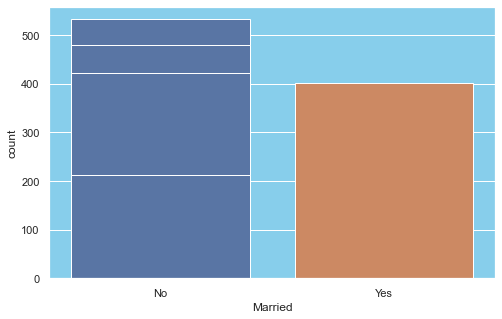

In [199]:
plt.figure(figsize=(8,5))
ax=plt.axes()
ax.set_facecolor("skyblue")
for i in cat_col:
    sns.countplot(loan_data[i])

We can see there are zero duplicate values. Let's check the correlation.

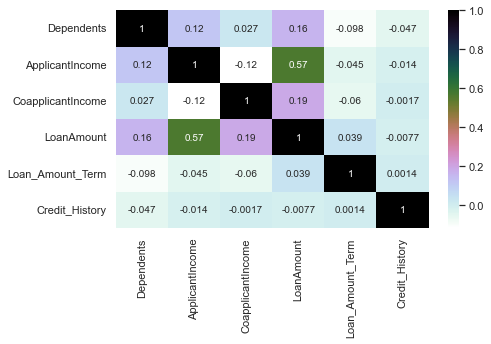

In [200]:
#Plotting a heatmap
plt.figure(figsize=(7,4))
sns.heatmap(loan_data.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

Data Visualization

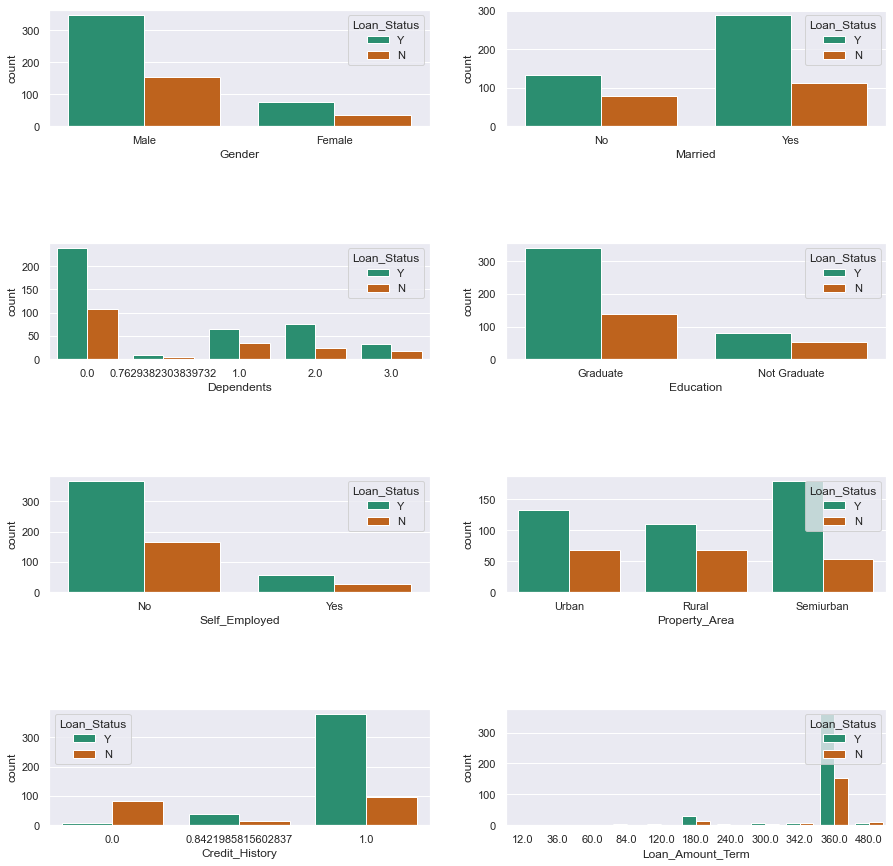

In [201]:
#checking the categorical datas

sns.set_theme(style="darkgrid")
fig,axes = plt.subplots(4,2,figsize=(15,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan_data,hue='Loan_Status',ax=axes[row,col],palette="Dark2")

plt.subplots_adjust(hspace=1)

From the above we can see that loans have been granted to men, three times more than women, most of them are married. The ones will zero dependants are likely to get loans. 

Majority approved are graduates and also not self employed. There are more applicants from semi-urban areas, they are also approved. 

An applicant with better credit history is more likely to be accepted for a loan. 

Most loans are taken for 360 Months or 30 years. 

Lastly, the approval status is about 2/3rd of applicants.

Now, let's find out if there is skewness in the data.

Skewness coeff. is: 6.539513
Kurtosis coeff. is: 60.540676


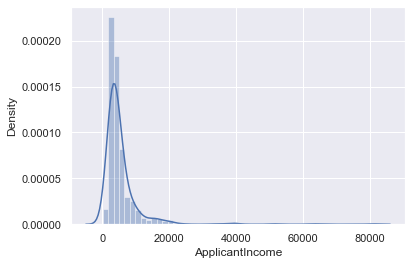

In [202]:
#ApplicantIncome analysis

sns.distplot(loan_data['ApplicantIncome']);
print("Skewness coeff. is: %f" % loan_data['ApplicantIncome'].skew())
print("Kurtosis coeff. is: %f" % loan_data['ApplicantIncome'].kurt())

Skewness coeff. is: 7.491531
Kurtosis coeff. is: 84.956384


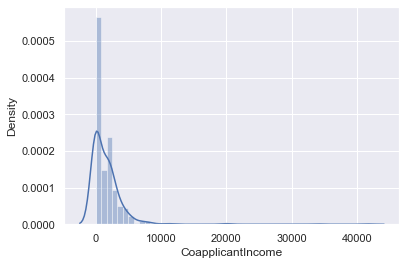

In [203]:
#CoapplicantIncome analysis

sns.distplot(loan_data['CoapplicantIncome']);
print("Skewness coeff. is: %f" % loan_data['CoapplicantIncome'].skew())
print("Kurtosis coeff. is: %f" % loan_data['CoapplicantIncome'].kurt())

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

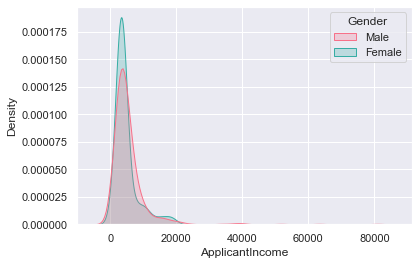

In [204]:
sns.kdeplot(data=loan_data,x='ApplicantIncome',hue="Gender",fill=True,common_norm=False,palette="husl")

From the above it is observed that there is skewness in the data which we will try to get rid in the following steps.

We will check outliers through boxplots in the numerical columns

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   84.037468
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  129.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


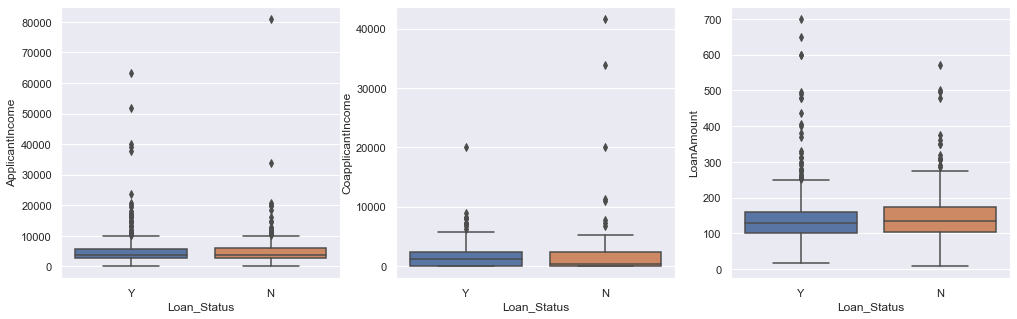

In [205]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=loan_data,x='Loan_Status',ax=axes[idx])

print(loan_data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

For the numercical columns we see there is no significant relation to Loan approval status. So, we will drop it.

In [206]:
x=loan_data.drop(["Loan_Status"],axis=1)
y=loan_data["Loan_Status"]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


In [207]:
loan_data.isnull().sum() #checking null values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We will now encode the categorical data so that it becomes easier to build our model. 

In [208]:
#Encoding categrical features
encoded_data = pd.get_dummies(loan_data,drop_first=True)
encoded_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1,1
1,1.0,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0
2,0.0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,1
4,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1,1


Model Building

In [209]:
#spliting data features and the target variable
X = encoded_data.drop(columns='Loan_Status_Y')
y = encoded_data['Loan_Status_Y']

In [210]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)


In [211]:
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

Applying Decision Tree Classifier

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


de_tree = DecisionTreeClassifier()
de_tree.fit(X_train,y_train)
y_pred = de_tree.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(de_tree,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(de_tree,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6619335886621327
Validation Mean Accuracy:  0.7046794475365904


We can see from that the model is overfitting as the Training Accuracy > Test Accuracy. We will try to remove it with Hyper-parameter tuning.

First let's try tuning 'Max_Depth' of tree

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

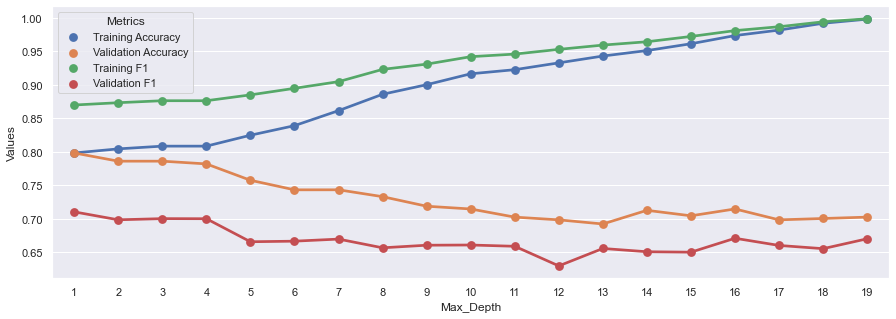

In [213]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    de_tree = DecisionTreeClassifier(max_depth=depth)
    de_tree.fit(X_train,y_train)
    y_training_pred = de_tree.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(de_tree,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(de_tree,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above graph, it is evident that by keeping the 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score Optimum Test Accuracy ~ 0.805; Optimum F1 Score: ~0.7

<AxesSubplot:xlabel='Min_Samples_leaf', ylabel='Values'>

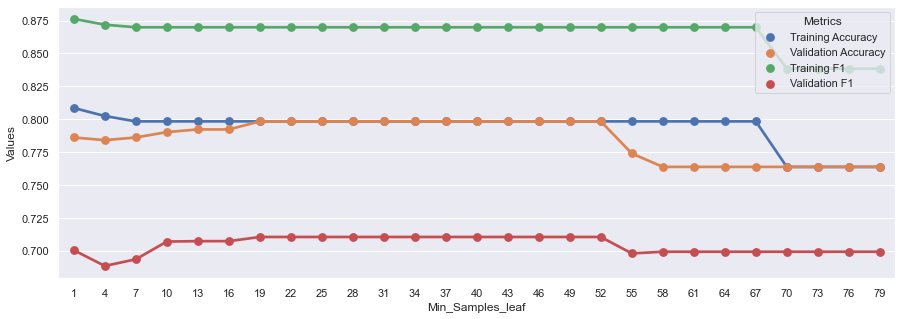

In [214]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): #Sweeping from 1% samples to 10% samples per leaf 
    de_tree = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    de_tree.fit(X_train,y_train)
    y_training_pred = de_tree.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(de_tree,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(de_tree,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above plot, we will choose the Min_Samples_leaf to 35 to improve test accuracy.

Let's use this Decision Tree classifier on the test data and evaluate Test Accuracy, F1 Score and Confusion Matrix

In [215]:
from sklearn.metrics import confusion_matrix
de_tree = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
de_tree.fit(X_train,y_train)
y_pred = de_tree.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


We can see that majority of the misclassifications are happening because of the Loan Reject applicants who have been classified as Accept.

Let's check if Random Forest Classifier can reduce mis-classifications

In [216]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8699080157687253
Train Accuracy  0.7983706720977597
Validation Mean F1 Score:  0.7105036634489533
Validation Mean Accuracy:  0.7983714698000413


In [217]:
#Now checking Random Forest Test Data Evaluation
y_pred = rfc.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


Random Forest is giving similar results as Decision Tree Classifier. We will now try Logistic Regression.

<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

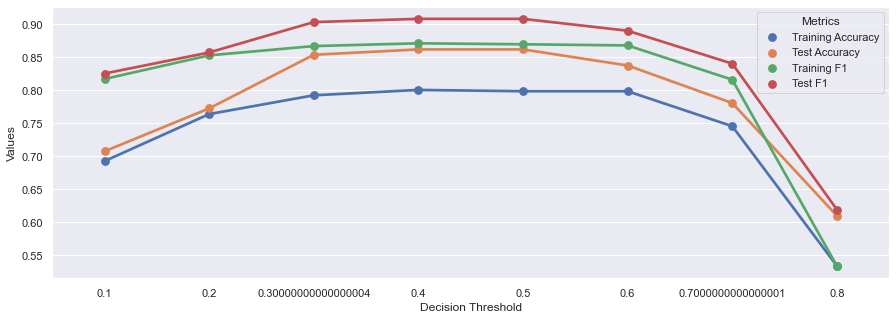

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg = LogisticRegression(solver='liblinear')
    logreg.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_lreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_lreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_lreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

We can see that Logistic Regression does slightly better than Decision Tree and Random Forest Classifier.
So, we can keep threshold to 0.4.
Finally, let's look at Logistic Regression Confusion Matrix

In [220]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8617886178861789
Test F1 Score:  0.9081081081081082
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,1,84,85
All,23,100,123


Here again we see that Logistic Regression Confusion matrix is very similar to Decision Tree and Random Forest Classifier. Thus, we conclude that that the highest accuracy we achieved with the test data is 86%. 

In [221]:
from joblib import Parallel, delayed
import joblib

#Saving the best model
joblib.dump(logreg, 'Loan_Application_Prediction.pkl')

['Loan_Application_Prediction.pkl']